### Vamos estudar o Algoritmo de Grover. Para isso, começaremos executando as células abaixo

In [5]:
# |00> --> Vermelho
# |01> --> Verde
# |10> --> Branco
# |11> --> Amarelo

In [4]:
!pip install pyfirmata

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 KB 704.2 kB/s eta 0:00:00 0:00:01


Como faremos uma prática com Arduino, execute a célula abaixo 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import*
from qiskit.circuit import*
from qiskit.visualization import*
import pyfirmata
import time

port = 'COM5' # Definindo a porta, arduino de acordo com o que está no Sketch.
board = pyfirmata.Arduino(port) # Criando o objeto "board" com a respoectiva porta


def pyQuantArd(results):
    qBits = len(list(results)[0])
    N = 2**qBits
    pinVermelho = 8 # 1000
    pinVerde = 9 # 0100
    pinBranco = 10 # 0010
    pinAmarelo = 11 # 0001
    
    initial_Array = np.zeros(2**qBits)
    for i in range(len(results)):
        initial_Array = initial_Array + np.identity(N)[int(list(results)[i],base = 2)]

    for i in range(5):
        time.sleep(0.1)
        board.digital[pinVermelho].write(int(initial_Array[0]))
        board.digital[pinVerde].write(int(initial_Array[1]))
        board.digital[pinBranco].write(int(initial_Array[2]))
        board.digital[pinAmarelo].write(int(initial_Array[3]))
        
        time.sleep(0.1)
        board.digital[pinVermelho].write(0)
        board.digital[pinVerde].write(0)
        board.digital[pinBranco].write(0)
        board.digital[pinAmarelo].write(0)
        time.sleep(0.1)

SerialException: [Errno 2] could not open port COM5: [Errno 2] No such file or directory: 'COM5'

##### Grover com 2 QuBits

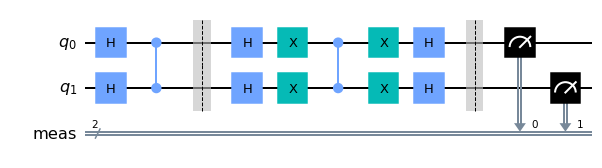

In [12]:
qBits = 2

m = 2 #Quantos Estados queremos achar
N = 2**qBits

t = int(np.pi/4*(np.sqrt(N/m))) # Números de Iterações Grover
qc = QuantumCircuit(qBits)
qc.h(range(qBits))
# Vamos definir o oráculo para o estado |11> que é o equivalente ao LED amarelo
qc.cz(0,1)
qc.barrier()
# Vamos definir o operador diffuser

for t_ in range(t):
    qc.h(range(qBits))
    qc.x(range(qBits))
    qc.cz(0,1)
    qc.x(range(qBits))
    qc.h(range(qBits))

qc.measure_all()
qc.draw('mpl')


<p> Agora, vamos extrair os resultados do circuito utilizando a função get_counts() <p>

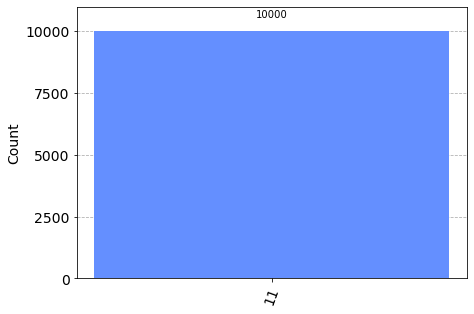

In [13]:
sim = Aer.get_backend("aer_simulator")
results = execute(qc,sim,shots = 10000).result().get_counts()
plot_histogram(results)

In [ ]:
pyQuantArd(results)

<b>Exercício 1: Agora é com você. Complete o Código de Grover para Ligar o LED branco e meça o circuito</b>

In [ ]:
qBits = 2

m = 1 #Quantos Estados queremos achar


N = 2**qBits
t = int(np.pi/4*(np.sqrt(N/m))) # Números de Iterações Grover
 qc = QuantumCircuit(qBits)
qc.h(range(qBits))


#Defina o Oráculo para o LED Branco

#======= COMEÇA O CÓDIGO AQUI ====== #



qc.cz(0,1)


# ======TERMINA O CÓDIGO AQUI ==== #


qc.barrier()

# Vamos definir o operador diffuser

for t_ in range(t):
    qc.h(range(qBits))
    qc.x(range(qBits))
    qc.cz(0,1)
    qc.x(range(qBits))
    qc.h(range(qBits))
#======= COMEÇA O CÓDIGO AQUI ====== #

#======= TERMINA O CÓDIGO AQUI ====== #




qc.draw('mpl')


In [ ]:
sim = Aer.get_backend("aer_simulator")
results = execute(qc,sim,shots = 10000).result().get_counts()

plot_histogram(results)

In [ ]:
pyQuantArd() # COMPLETE COM O OBJETO QUE GUARDA OS RESULTADOS

### Definindo um Grover de 3 QuBits
##### Exercício 2: <p>Para isso precisamos criar uma porta multi-controlada Z, pois não existe uma porta multi-controlada Z no qiskit para 3 ou mais QuBits. 
<p>Crie uma porta multi-controle Z utilizando portas CNOTs multi-controle e Hadamards </p>
<p>Dica HXH = Z </p>

#=======================Criando uma Porta MultiControl Z==================

In [ ]:
mcz_ = QuantumCircuit(3)

### COMEÇA O CÓDIGO AQUI

mcz_.mcx([0,1],2)

### TERMINA O CÓDIGO AQUI

mcz = mcz_.to_instruction(label='Multi_controlZ')
mcz_.draw('mpl')

#### Exercício 3: Crie um oráculo para 3 QuBits para medir o LED Amarelo

In [ ]:
from qiskit import*
from qiskit.visualization import*
from qiskit.circuit import*




qBits = 3


N = 2**qBits
m = 1
t = int(np.floor(np.pi/4*(np.sqrt(N/m))))
qRegs = QuantumRegister(qBits, 'qReg')
qc = QuantumCircuit(qRegs)

[qc.h(i) for i in range(qBits)]

for t_ in range(t):
    qc.barrier()
    
    # COMECE O CÓDIGO AQUI
    
    
   
   
    # TERMINE O CÓDIGO AQUI
    
    qc.barrier()

    [qc.h(i) for i in range(qBits)]
    [qc.x(i) for i in range(qBits)]
    qc.append(mcz,[0,1,2])
    [qc.x(i) for i in range(qBits)]
    [qc.h(i) for i in range(qBits)]

qc.measure_all()


qc.draw('mpl')

In [ ]:
sim = Aer.get_backend("aer_simulator")

results = execute(qc, sim).result().get_counts()
plot_histogram(results)

In [ ]:
import heapq
results  = dict(heapq.nlargest(m, results.items(), key= lambda item: item[1])) 
# Esta Função acima é para pegar os estados com maiores probabilidades

In [ ]:
pyQuantArd() # ADICIONE OS RESULTADOS DE GROVER

<b>Exercício 4: Complete o Código de Grover para Ligar o LED branco, LED Verde, Led Amarelo</b>

In [ ]:
from qiskit import*
from qiskit.visualization import*
from qiskit.circuit import*

qBits = 3


N = 2**qBits
m = 3
t = int(np.floor(np.pi/4*(np.sqrt(N/m))))
qRegs = QuantumRegister(qBits, 'qReg')
qc = QuantumCircuit(qRegs)

[qc.h(i) for i in range(qBits)]

for t_ in range(t):
    qc.barrier()
    
    #===================== Oráculo para o LED Branco =======================
    
    
    qc.barrier()
    #===================== Oráculo para o LED Verde ======================
    
    
    
    qc.barrier()
    
    #====================== Oráculo para o LED Amarelo ======================
   
    
    qc.barrier()

    [qc.h(i) for i in range(qBits)]
    [qc.x(i) for i in range(qBits)]
    qc.append(mcz,[0,1,2])
    [qc.x(i) for i in range(qBits)]
    [qc.h(i) for i in range(qBits)]

qc.measure_all()


qc.draw('mpl')

In [ ]:
sim = Aer.get_backend("aer_simulator")

results = execute(qc, sim).result().get_counts()
plot_histogram(results)

In [ ]:
import heapq
results  = dict(heapq.nlargest(m, results.items(), key= lambda item: item[1]))


In [ ]:
pyQuantArd() # ADICIONE OS RESULTADOS DE GROVER

DESAFIO (OPCIONAL): A porta Hadarmad pode superpor estados de um qubit. Ao aplicar a Hadarmard em |0> temos um estado $$H|0\rangle = \frac{|0\rangle + |1\rangle}{2}$$ Se fizermos 10000 medidas, a tendência é que a metade dessas medidas vai para o estado |0> e a outra metade vai para o estado |1>. 

<p>O Desafio é para criar um algoritmo quântico com 2 Qubits que selecione UM LED de uma determinada cor através do Algoritmo de Grover. Após isso, um outro algoritmo Quântico que utilize a porta Hadarmard faça medidas aleatórias neste LED, ao ponto de fazê-lo desligar e ligar cerca de 10000 vezes. </p>


<b>ATENÇAO: FAÇA ISSO PARA TODAS AS POSSÍVEIS CORES</b>